<a href="https://colab.research.google.com/github/maciejskorski/autocorrelations_trng/blob/main/notebooks/extractors_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary

This experiment compares two randonmness extractors: subsampling and xoring for bits generated by ring oscillators. 

# Installation

In [1]:
# run to install on Colab
!pip install --upgrade pip --quiet
!git clone https://github.com/maciejskorski/deep_correlations_trng.git --quiet
%cd deep_correlations_trng
!pip install . --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.5 MB/s eta 0:00:00
/content/deep_correlations_trng
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 3.8 MB/s eta 0:00:00


# Data

In [2]:
try:
    from importlib.resources import files
except:
    from importlib_resources import files
from deep_correlations_trng.utils import read_bits
from deep_correlations_trng import data

from statsmodels.graphics.tsaplots import acf,plot_acf
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')


plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

data_files = files(data).joinpath('experiment1').rglob('*.bin')
data_files = list(data_files)
data_files

[PosixPath('/usr/local/lib/python3.8/dist-packages/deep_correlations_trng/data/experiment1/acq_20230118155436_dff.bin'),
 PosixPath('/usr/local/lib/python3.8/dist-packages/deep_correlations_trng/data/experiment1/acq_20230118155612_dff.bin')]

# Analysis

## Autocorrelation (ACF)

Let's compare two ways of extracting: by subsampling and by xoring. The autocorrelation is computed on last 1M of bits.

/usr/local/lib/python3.8/dist-packages/deep_correlations_trng/data/experiment1/acq_20230118155436_dff.bin
/usr/local/lib/python3.8/dist-packages/deep_correlations_trng/data/experiment1/acq_20230118155612_dff.bin


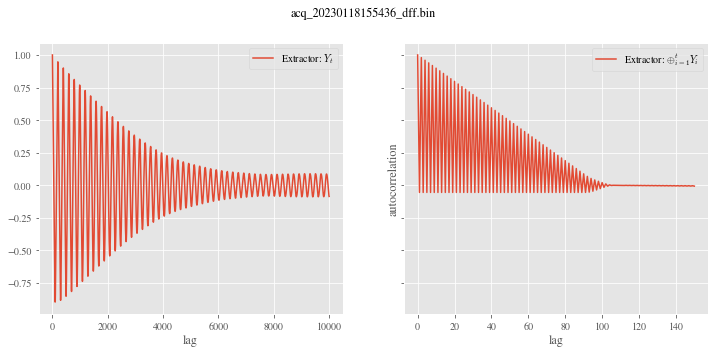

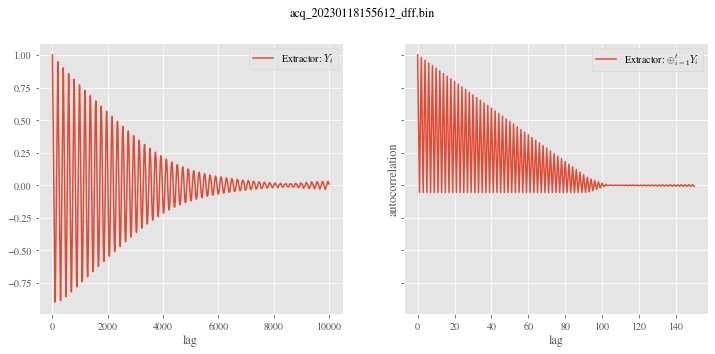

In [3]:
for fname in data_files:
    print(fname)
    bits = read_bits(fname)
    bits = bits[-1000000:]

    fig,axs = plt.subplots(1,2,figsize=(12,5),sharey=True)

    # subsampling extractor
    ax = axs[0]
    y = bits
    nlags = 10000
    lags = np.arange(nlags+1)
    ax.plot(lags, acf(y,nlags=nlags,fft=True),label=r'Extractor: $Y_t$')
    ax.legend()
    ax.set_xlabel('lag')

    # xoring extractor
    ax = axs[1]
    y = np.cumsum(y)%2
    nlags = 150
    lags = np.arange(nlags+1)
    ax.plot(lags, acf(y,nlags=nlags,fft=True),label=r'Extractor: $\oplus_{i=1}^{t}Y_i$')
    ax.legend()

    ax.set_xlabel('lag')
    ax.set_ylabel('autocorrelation')


    fig.suptitle(f'{fname.name}')
    fig.patch.set_alpha(1.0)

plt.show()

## Counter Distribution

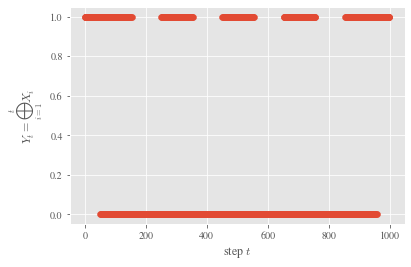

In [4]:
bits = read_bits(data_files[0])
counter = np.cumsum(bits)
fig,ax = plt.subplots()
ax.scatter(range(1000),counter[-1000:]%2)
ax.set_xlabel(r'step $t$')
ax.set_ylabel(r'$Y_t=\bigoplus_{i=1}^{t} X_i$')
plt.show()

# Conclusions

* We see that the "subsampling" extractor has much longer memory than the "xoring" extractor.
* Can we have a rigrous proof for that?
